In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df



In [ ]:
df.nunique()

In [20]:
df.describe()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.894381,1.376982,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.698235,1.071626,0.215340
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,36922.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.400000,2.000000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [21]:
#look for missing values 
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [22]:
#add values to empty spots 
df['bmi'] = df['bmi'].fillna(np.round(df.bmi.mean(), 2))
df


<ipython-input-22-4d77684ec201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = df['bmi'].fillna(np.round(df.bmi.mean(), 2))


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.60,1,0


In [23]:
#look for missing values 
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [24]:
#looking into categorial data 
categorial_data=df.loc[:,df.nunique() <= 5]
cat_cols = [col for col in df.columns if col in categorial_data]
for col in cat_cols:
    col_data = df[col].value_counts()
    print(col + " value count:")
    print(col_data)
    print ("####")

gender value count:
0    2994
1    2115
Name: gender, dtype: int64
####
hypertension value count:
0    4611
1     498
Name: hypertension, dtype: int64
####
heart_disease value count:
0    4833
1     276
Name: heart_disease, dtype: int64
####
ever_married value count:
1    3353
0    1756
Name: ever_married, dtype: int64
####
work_type value count:
2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
####
Residence_type value count:
1    2596
0    2513
Name: Residence_type, dtype: int64
####
smoking_status value count:
2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64
####
stroke value count:
0    4860
1     249
Name: stroke, dtype: int64
####


In [25]:
#remove other from gender 
df = df[df['gender'] != 'Other']
df.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

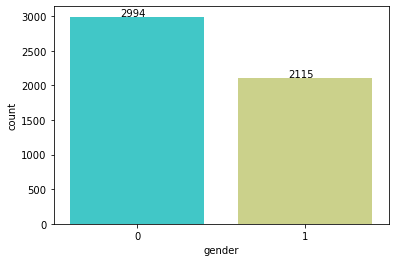

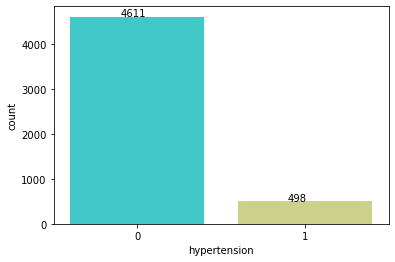

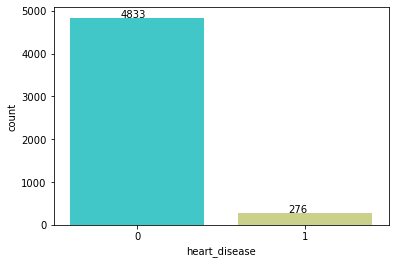

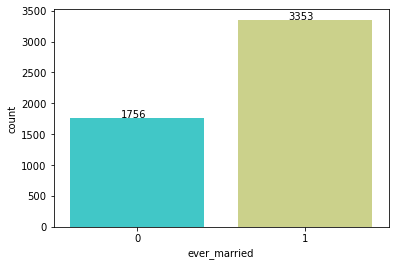

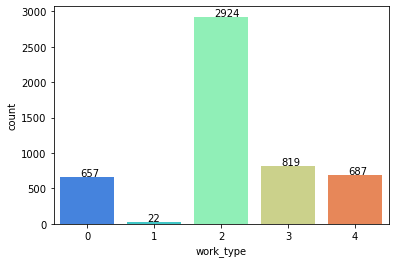

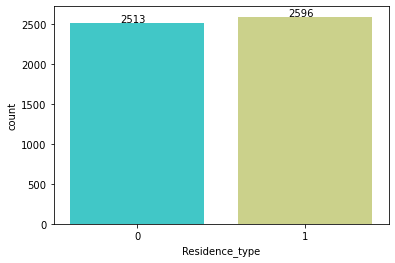

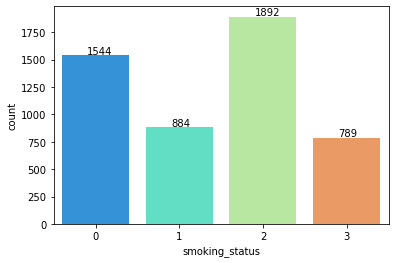

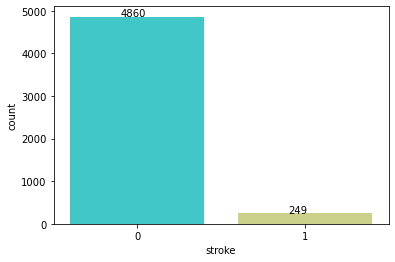

In [26]:
# count plot for categorial columns
categorial_data=df.loc[:,df.nunique() <= 5]
categorial_data
cat_cols = [col for col in df.columns if col in categorial_data]
for col in cat_cols:
    ax=sns.countplot(data=df,x=col, palette='rainbow')
    for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10
            ))
    plt.show()

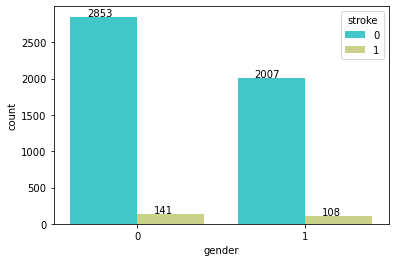

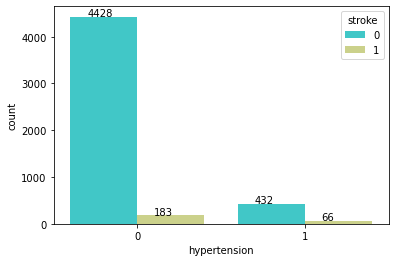

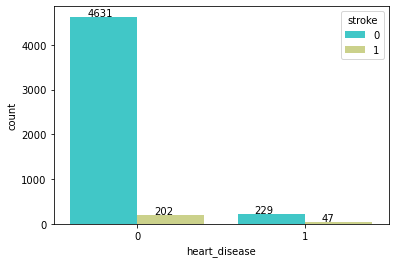

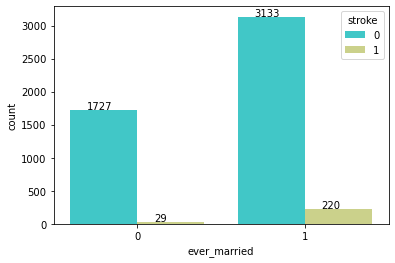

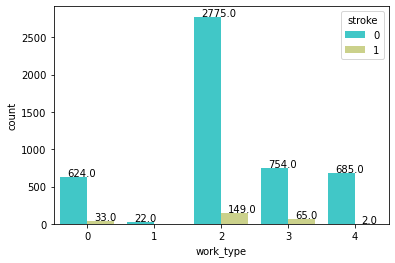

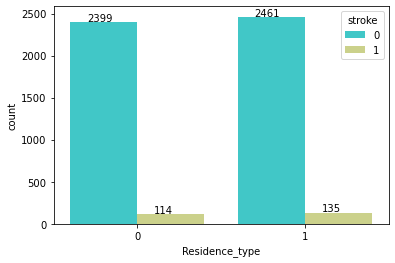

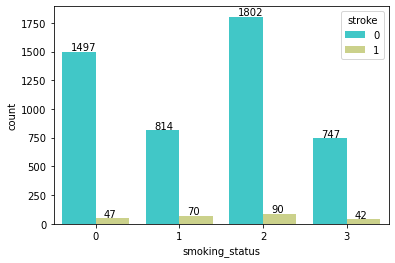

In [27]:
# count plot for categorial columns divided by stroke status
for col in cat_cols:
    if col != 'stroke':
        ax=sns.countplot(data=df,x=col, palette='rainbow', hue='stroke')
        for p in ax.patches:
                ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10
                ))
        plt.show()

In [28]:
# change categorial columns to numbers 
cat_cols = [col for col in df.columns
                        if df[col].dtype == 'object']
encoder = preprocessing.LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.60,1,0


<AxesSubplot:>

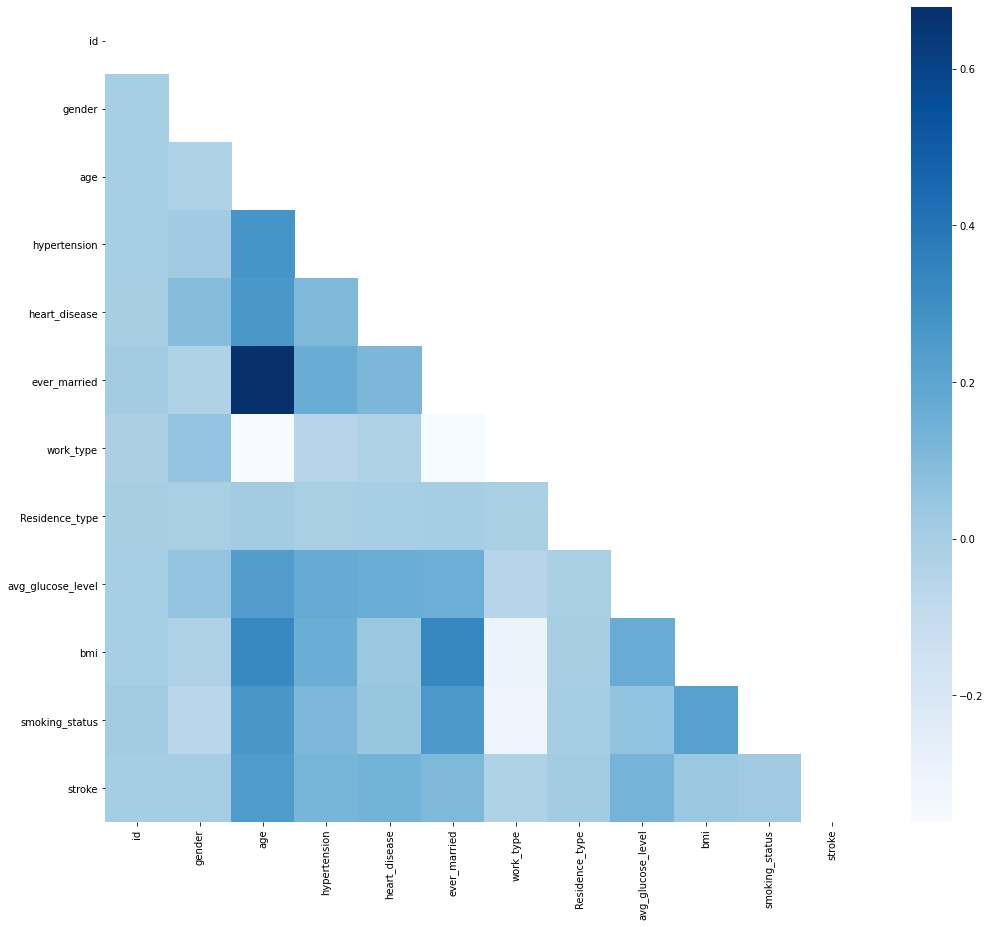

In [29]:
#correlation
plt.figure(figsize=(17, 15))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues')
h_map

In [47]:
#spliting the data
X = df.drop(['id','stroke'], axis=1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_RF = df.drop(['id','stroke','ever_married','work_type','Residence_type','gender','bmi','smoking_status'], axis=1)
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y, test_size = 0.25, random_state = 0)

In [48]:
# Training the classifier with various models

# SVM

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)

# classifier_svc.fit(X_train_RF, y_train_RF)

# Kernel SVM

classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)

# classifier_rbf.fit(X_train_RF, y_train_RF)


# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

# classifier_knn.fit(X_train_RF, y_train_RF)


# Decsion Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

# classifier_dt.fit(X_train_RF, y_train_RF)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
# Finding the predictions of each model

y_pred_svc = classifier_svc.predict(X_test)
#y_pred_svc_RF = classifier_svc.predict(X_test_RF)


y_pred_rbf = classifier_rbf.predict(X_test)
#y_pred_rbf_RF = classifier_rbf.predict(X_test_RF)


y_pred_knn = classifier_knn.predict(X_test)
#y_pred_knn_RF = classifier_knn.predict(X_test_RF)


y_pred_dt = classifier_dt.predict(X_test)
#y_pred_dt_RF = classifier_dt.predict(X_test_RF)

In [50]:
# Finding the accuracy of each model

from sklearn.metrics import accuracy_score

print("SVM - " , accuracy_score(y_test, y_pred_svc))
#print("SVM_RF " , accuracy_score(y_test_RF, y_pred_svc_RF))


print("Kernel SVM - ", accuracy_score(y_test, y_pred_rbf))
#print("Kernel SVM_RF ", accuracy_score(y_test_RF, y_pred_rbf_RF))


print("KNN - " , accuracy_score(y_test, y_pred_knn))
#print("KNN_RF " , accuracy_score(y_test_RF, y_pred_knn_RF))


print("Decision Tree - ", accuracy_score(y_test, y_pred_dt))
#print("Decision Tree_RF ", accuracy_score(y_test_RF, y_pred_dt_RF))



SVM -  0.9491392801251957
Kernel SVM -  0.9491392801251957
KNN -  0.9444444444444444
Decision Tree -  0.9092331768388107
